## Hierarchical Clustering

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load and read dataset

In [2]:
df = pd.read_csv("Wholesale customers data.csv")
X = df.iloc[:, [2, 3]].values
df.head(15)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [3]:
df.tail(15)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
425,1,3,11243,2408,2593,15348,108,1886
426,1,3,13134,9347,14316,3141,5079,1894
427,1,3,31012,16687,5429,15082,439,1163
428,1,3,3047,5970,4910,2198,850,317
429,1,3,8607,1750,3580,47,84,2501
430,1,3,3097,4230,16483,575,241,2080
431,1,3,8533,5506,5160,13486,1377,1498
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838


In [4]:
df.sample(15)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
244,1,1,6202,7775,10817,1183,3143,1970
309,2,2,918,20655,13567,1465,6846,806
143,1,3,10405,1596,1096,8425,399,318
181,1,3,112151,29627,18148,16745,4948,8550
4,2,3,22615,5410,7198,3915,1777,5185
152,1,3,18840,1371,3135,3001,352,184
49,2,3,4967,21412,28921,1798,13583,1163
102,2,3,2932,6459,7677,2561,4573,1386
256,1,1,11092,5008,5249,453,392,373
148,1,3,5924,584,542,4052,283,434


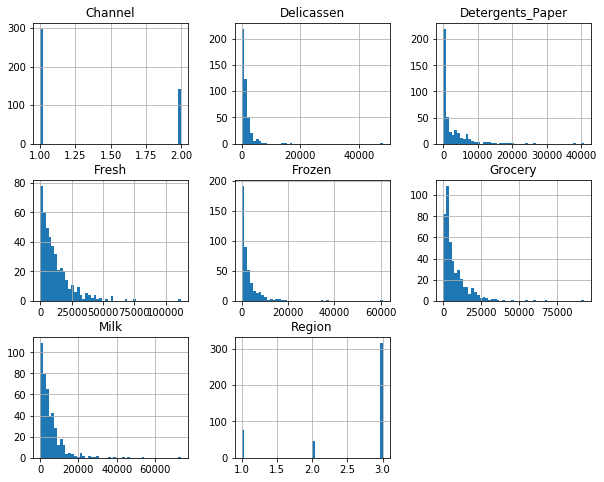

In [5]:
df.hist(bins = 50, figsize=(10, 8))
plt.show()

In [6]:
print(X)

[[ 12669   9656]
 [  7057   9810]
 [  6353   8808]
 [ 13265   1196]
 [ 22615   5410]
 [  9413   8259]
 [ 12126   3199]
 [  7579   4956]
 [  5963   3648]
 [  6006  11093]
 [  3366   5403]
 [ 13146   1124]
 [ 31714  12319]
 [ 21217   6208]
 [ 24653   9465]
 [ 10253   1114]
 [  1020   8816]
 [  5876   6157]
 [ 18601   6327]
 [  7780   2495]
 [ 17546   4519]
 [  5567    871]
 [ 31276   1917]
 [ 26373  36423]
 [ 22647   9776]
 [ 16165   4230]
 [  9898    961]
 [ 14276    803]
 [  4113  20484]
 [ 43088   2100]
 [ 18815   3610]
 [  2612   4339]
 [ 21632   1318]
 [ 29729   4786]
 [  1502   1979]
 [   688   5491]
 [ 29955   4362]
 [ 15168  10556]
 [  4591  15729]
 [ 56159    555]
 [ 24025   4332]
 [ 19176   3065]
 [ 10850   7555]
 [   630  11095]
 [  9670   7027]
 [  5181  22044]
 [  3103  14069]
 [ 44466  54259]
 [ 11519   6152]
 [  4967  21412]
 [  6269   1095]
 [  3347   4051]
 [ 40721   3916]
 [   491  10473]
 [ 27329   1449]
 [  5264   3683]
 [  4098  29892]
 [  5417   9933]
 [ 13779   197

### Basic insight into the dataset

In [7]:
df.shape

(440, 8)

In [8]:
df.columns. values

array(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'], dtype=object)

In [9]:
df.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [11]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

## Descriptive Statistic

In [12]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


## Handling missing data

In [14]:
missing_data = df.isnull()
missing_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


### Checking the missing_data per column

In [15]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Channel
False    440
Name: Channel, dtype: int64

Region
False    440
Name: Region, dtype: int64

Fresh
False    440
Name: Fresh, dtype: int64

Milk
False    440
Name: Milk, dtype: int64

Grocery
False    440
Name: Grocery, dtype: int64

Frozen
False    440
Name: Frozen, dtype: int64

Detergents_Paper
False    440
Name: Detergents_Paper, dtype: int64

Delicassen
False    440
Name: Delicassen, dtype: int64



### Count of missing data

In [16]:
missing_data_count = df.isnull().sum()
missing_data_count

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

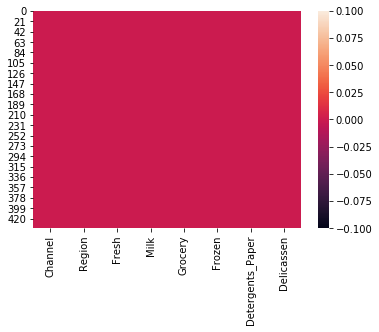

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


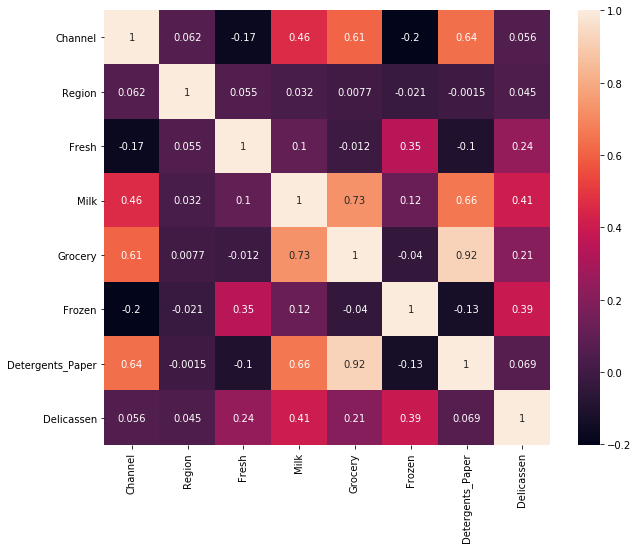

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [21]:
print(X)

[[ 5.29331898e-02  5.23567773e-01]
 [-3.91301970e-01  5.44457667e-01]
 [-4.47029261e-01  4.08537706e-01]
 [ 1.00111407e-01 -6.24019925e-01]
 [ 8.40239480e-01 -5.23964546e-02]
 [-2.04805527e-01  3.34066589e-01]
 [ 9.95035090e-03 -3.52315651e-01]
 [-3.49981451e-01 -1.13980948e-01]
 [-4.77900913e-01 -2.91409401e-01]
 [-4.74497115e-01  7.18494904e-01]
 [-6.83474454e-01 -5.33459952e-02]
 [ 9.06915953e-02 -6.33786629e-01]
 [ 1.56049887e+00  8.84800166e-01]
 [ 7.29576481e-01  5.58511794e-02]
 [ 1.00156365e+00  4.97658878e-01]
 [-1.38312738e-01 -6.35143116e-01]
 [-8.69179316e-01  4.09622895e-01]
 [-4.84787666e-01  4.89330975e-02]
 [ 5.22498936e-01  7.19933704e-02]
 [-3.34070677e-01 -4.47812310e-01]
 [ 4.38987159e-01 -1.73259414e-01]
 [-5.09247514e-01 -6.68105741e-01]
 [ 1.52582763e+00 -5.26217238e-01]
 [ 1.13771556e+00  4.15447557e+00]
 [ 8.42772539e-01  5.39845613e-01]
 [ 3.29669847e-01 -2.12461878e-01]
 [-1.66413857e-01 -6.55897361e-01]
 [ 1.80140229e-01 -6.77329850e-01]
 [-6.24343366e-01  1

### Using the Dendrogram method to find the optimal number of clusters

Text(0, 0.5, 'Euclidean distances')

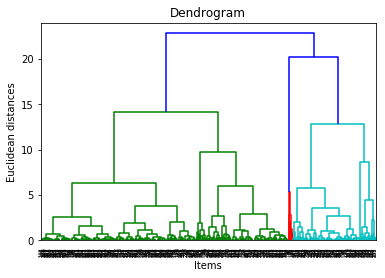

In [22]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Items")
plt.ylabel("Euclidean distances")

## Training theHierarchical Clustering on the dataset

In [23]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
y_hc = hc.fit_predict(X)

In [24]:
print(y_hc)

[0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 2 1 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 1 1 0 0 0 0 0 2 0 0 0 0 1 0 1 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 2 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0]


### Visualising the Clusters

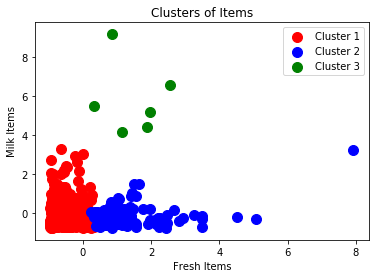

In [25]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = "red", label = "Cluster 1")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = "blue", label = "Cluster 2")
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = "green", label = "Cluster 3")
plt.title("Clusters of Items")
plt.xlabel("Fresh Items")
plt.ylabel("Milk Items")
plt.legend()
plt.show()